In [542]:
import math
import numpy as np
from matplotlib import pyplot as plt

In [543]:
def k_means_clustering(dataset, k):
    # n is the number of samples
    n = dataset.shape[0]
    
    # randomly choosing samples from the dataset
    cluster_centers = dataset[np.random.choice(n, k, replace=False)]
    
    # Initializing two 2D lists to contain k number of 1D lists for the k centers
    clusters = [[] for _ in range(cluster_centers.shape[0])]
    temp_clusters = [[] for _ in range(cluster_centers.shape[0])]
    
    iteration = 0
    
    while True:
        # Clear temporary clusters at the start of each iteration
        temp_clusters = [[] for _ in range(cluster_centers.shape[0])]
        
        # Determine distance between sample and centers.
        distance = np.zeros((n, k))
        for i in range(k):
            distance[:, i] = ((dataset-cluster_centers[i])**2).sum(axis=1) ** 0.5
        
        # Keep the minimum distance
        closest_center_indices = np.argmin(distance, axis=1)
        
        for sample_idx, center_idx in enumerate(closest_center_indices):
            # Append sample index in the ith list of temporary clusters
            temp_clusters[center_idx].append(sample_idx)
            
        # Calculate new centers by determining the average
        for i in range(k):
            cluster_centers[i] = dataset[closest_center_indices == i].mean(axis=0)
        
        iteration+=1
        
        if iteration > 1:
            # Initializing a ndarray to store the shifts
            shifts = np.zeros(dataset.shape[0], dtype=bool)
            
            for idx, sample in enumerate(dataset):
                # Check the change between two clusters, difference means we need to shift
                if clusters != temp_clusters:
                    shifts[idx] = True
            
            # Count the total shifts
            shift_count = np.sum(shifts)
            
            # If data didn't change much we can break the loop
            if shift_count < 10:
                clusters = temp_clusters.copy()
                break
        
        # Else start again with the new cluster values
        clusters = temp_clusters.copy()
    
    plt.scatter(dataset[:,0],dataset[:,1],c=closest_center_indices)
    plt.scatter(cluster_centers[:,0],cluster_centers[:,1],marker='*')
    plt.title('K-Means Clustering')
    plt.show()

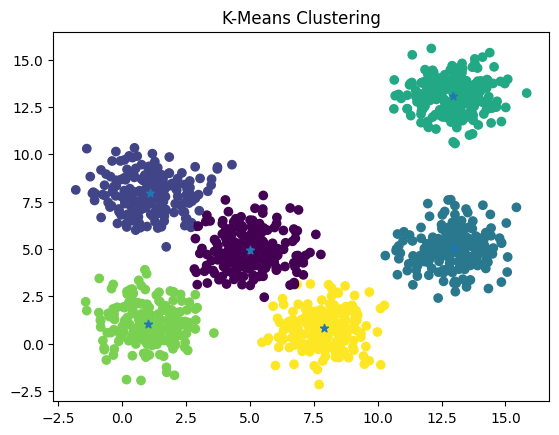

In [544]:
# Load data.csv into 2D numpy array
path = 'offline_5_data.csv'
data = np.genfromtxt(path, delimiter=',')
# Set the value of K
k_value = 6


k_means_clustering(data, k_value)

In [545]:
# cluster_centers = data[np.random.choice(n, k, replace=False)]

In [546]:
# print(cluster_centers)

In [547]:
# data[0]

In [548]:
# cluster_centers[0]

In [549]:
# Initialize 2 2D lists named "Clusters" and "Temp_Clusters"
# clusters = [[] for _ in range(cluster_centers.shape[0])]
# temp_clusters = [[] for _ in range(cluster_centers.shape[0])]


# temp_clusters = list()

In [550]:
# temp_clusters = [[] for _ in range(k)]
# for i, sample in enumerate(data):
#     min_distance_idx = np.argmin(np.linalg.norm(sample - cluster_centers, axis=1))
#     temp_clusters[min_distance_idx].append(i)

In [551]:
# temp_clusters

In [552]:
# # Determine distance between "S" and "C".
# distance = np.zeros((n, k))
# for i in range(k):
#     distance[:, i] = ((data-cluster_centers[i])**2).sum(axis=1) ** 0.5

In [553]:
# distance.shape

In [554]:
# closest_center_indices = np.argmin(distance, axis=1)
# for sample_idx, center_idx in enumerate(closest_center_indices):
#     temp_clusters[center_idx].append(sample_idx)

In [555]:
# closest_center_indices

In [556]:
# len(temp_clusters)

In [557]:
# temp_clusters = np.argmin(distance, axis=1)

In [558]:
# len(temp_clusters)

In [559]:
# Alternative way:

# for cluster_idx, cluster_samples in enumerate(temp_clusters):
#     if len(cluster_samples) > 0:
#         cluster_centers[cluster_idx] = np.mean(data[cluster_samples], axis=0)

In [560]:
# for i in range(k):
#     cluster_centers[i] = data[closest_center_indices == i].mean(axis=0)

In [561]:
# cluster_centers